# TDPF parameters

This tutorial adds more detail to the tutorial about Temperature Dependent Power Flow (TDPF) by exploring the influence of different input parameters. The method, plots and parameter variations are based on the following paper:

B. Ngoko, H. Sugihara and T. Funaki, "A Temperature Dependent Power Flow Model Considering Overhead Transmission Line Conductor Thermal Inertia Characteristics," 2019 IEEE International Conference on Environment and Electrical Engineering and 2019 IEEE Industrial and Commercial Power Systems Europe (EEEIC / I&CPS Europe), 2019, pp. 1-6, doi: 10.1109/EEEIC.2019.8783234.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pandapower.pf.create_jacobian_tdpf import calc_a0_a1_a2_tau, calc_T_ngoko

In [2]:
# conductor data
t_amb = 40
t_max = 90
t_ref = 25
r_ref_ohm_per_m = 0.1824e-3
conductor_outer_diameter_m = 18.2e-3
v_m_per_s = 0.5
wind_angle_degree = 45
s_w_per_square_meter = 1000
alpha = 0.004
gamma = epsilon = 0.5
mc_joule_per_m_k = 525

# Wind speed

First, we calculate the overhead line temperature depending on the current that is flowing through the line for three different wind speed scenarios.

In [3]:
v_m_per_s = 0.5
a0, a1, a2, tau = calc_a0_a1_a2_tau(t_amb, t_max, t_ref, r_ref_ohm_per_m,
                                    conductor_outer_diameter_m, mc_joule_per_m_k,
                                    v_m_per_s, wind_angle_degree, s_w_per_square_meter)

t_05 = [calc_T_ngoko(i**2, a0, a1, a2, None, None, None) for i in range(601)]

In [4]:
v_m_per_s = 2
a0, a1, a2, tau = calc_a0_a1_a2_tau(t_amb, t_max, t_ref, r_ref_ohm_per_m,
                                    conductor_outer_diameter_m, mc_joule_per_m_k,
                                    v_m_per_s, wind_angle_degree, s_w_per_square_meter)

t_2 = [calc_T_ngoko(i**2, a0, a1, a2, None, None, None) for i in range(601)]

In [5]:
v_m_per_s = 5
a0, a1, a2, tau = calc_a0_a1_a2_tau(t_amb, t_max, t_ref, r_ref_ohm_per_m,
                                    conductor_outer_diameter_m, mc_joule_per_m_k,
                                    v_m_per_s, wind_angle_degree, s_w_per_square_meter)

t_5 = [calc_T_ngoko(i**2, a0, a1, a2, None, None, None) for i in range(601)]

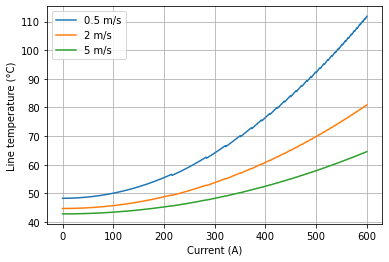

In [6]:
ax=plt.subplot()
ax.plot(np.vstack([t_05, t_2, t_5]).T, label=["0.5 m/s", "2 m/s", "5 m/s"])
ax.grid(True)
ax.set_ylabel('Line temperature (°C)')
ax.set_xlabel('Current (A)')
ax.legend()

# Ambient temperature

Here we specify three different scenarios for ambient air temperature.

In [7]:
v_m_per_s = 0.5
t_amb = 0
a0, a1, a2, tau = calc_a0_a1_a2_tau(t_amb, t_max, t_ref, r_ref_ohm_per_m,
                                    conductor_outer_diameter_m, mc_joule_per_m_k,
                                    v_m_per_s, wind_angle_degree, s_w_per_square_meter)

t_0 = [calc_T_ngoko(i**2, a0, a1, a2, None, None, None) for i in range(601)]

In [8]:
t_amb = 20
a0, a1, a2, tau = calc_a0_a1_a2_tau(t_amb, t_max, t_ref, r_ref_ohm_per_m,
                                    conductor_outer_diameter_m, mc_joule_per_m_k,
                                    v_m_per_s, wind_angle_degree, s_w_per_square_meter)

t_20 = [calc_T_ngoko(i**2, a0, a1, a2, None, None, None) for i in range(601)]

In [9]:
t_amb = 40
a0, a1, a2, tau = calc_a0_a1_a2_tau(t_amb, t_max, t_ref, r_ref_ohm_per_m,
                                    conductor_outer_diameter_m, mc_joule_per_m_k,
                                    v_m_per_s, wind_angle_degree, s_w_per_square_meter)

t_40 = [calc_T_ngoko(i**2, a0, a1, a2, None, None, None) for i in range(601)]

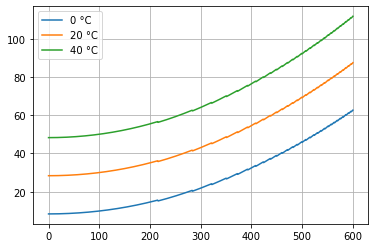

In [10]:
ax=plt.subplot()
ax.plot(np.vstack([t_0, t_20, t_40]).T, label=["0 °C", "20 °C", "40 °C"])
ax.grid(True)
ax.legend()

# Wind Direction

We specify three different scenarios for the wind angle of attack.

In [11]:
v_m_per_s = 0.5
wind_angle_degree = 0
a0, a1, a2, tau = calc_a0_a1_a2_tau(t_amb, t_max, t_ref, r_ref_ohm_per_m,
                                    conductor_outer_diameter_m, mc_joule_per_m_k,
                                    v_m_per_s, wind_angle_degree, s_w_per_square_meter)

t_0 = [calc_T_ngoko(i**2, a0, a1, a2, None, None, None) for i in range(601)]

In [12]:
wind_angle_degree = 45
a0, a1, a2, tau = calc_a0_a1_a2_tau(t_amb, t_max, t_ref, r_ref_ohm_per_m,
                                    conductor_outer_diameter_m, mc_joule_per_m_k,
                                    v_m_per_s, wind_angle_degree, s_w_per_square_meter)

t_45 = [calc_T_ngoko(i**2, a0, a1, a2, None, None, None) for i in range(601)]

In [13]:
wind_angle_degree = 90
a0, a1, a2, tau = calc_a0_a1_a2_tau(t_amb, t_max, t_ref, r_ref_ohm_per_m,
                                    conductor_outer_diameter_m, mc_joule_per_m_k,
                                    v_m_per_s, wind_angle_degree, s_w_per_square_meter)

t_90 = [calc_T_ngoko(i**2, a0, a1, a2, None, None, None) for i in range(601)]

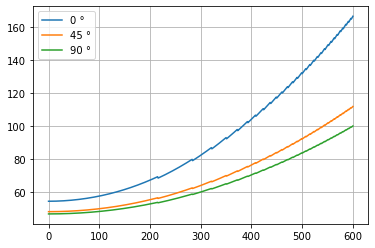

In [14]:
ax=plt.subplot()
ax.plot(np.vstack([t_0, t_45, t_90]).T, label=["0 °", "45 °", "90 °"])
ax.grid(True)
ax.legend()

# Solar Radiation

In [15]:
v_m_per_s = 0.5
wind_angle_degree = 45
s_w_per_square_meter = 0
a0, a1, a2, tau = calc_a0_a1_a2_tau(t_amb, t_max, t_ref, r_ref_ohm_per_m,
                                    conductor_outer_diameter_m, mc_joule_per_m_k,
                                    v_m_per_s, wind_angle_degree, s_w_per_square_meter)

t_0 = [calc_T_ngoko(i**2, a0, a1, a2, None, None, None) for i in range(601)]

In [16]:
s_w_per_square_meter = 500
a0, a1, a2, tau = calc_a0_a1_a2_tau(t_amb, t_max, t_ref, r_ref_ohm_per_m,
                                    conductor_outer_diameter_m, mc_joule_per_m_k,
                                    v_m_per_s, wind_angle_degree, s_w_per_square_meter)

t_500 = [calc_T_ngoko(i**2, a0, a1, a2, None, None, None) for i in range(601)]

In [17]:
s_w_per_square_meter = 1000
a0, a1, a2, tau = calc_a0_a1_a2_tau(t_amb, t_max, t_ref, r_ref_ohm_per_m,
                                    conductor_outer_diameter_m, mc_joule_per_m_k,
                                    v_m_per_s, wind_angle_degree, s_w_per_square_meter)

t_1000 = [calc_T_ngoko(i**2, a0, a1, a2, None, None, None) for i in range(601)]

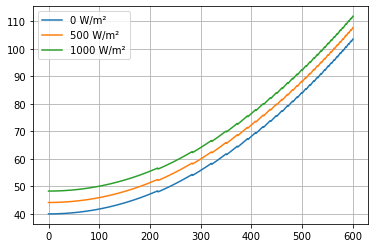

In [18]:
ax=plt.subplot()
ax.plot(np.vstack([t_0, t_500, t_1000]).T, label=["0 W/m²", "500 W/m²", "1000 W/m²"])
ax.grid(True)
ax.legend()

# Conclusion

The wind speed, ambient air temperature and the wind angle of attack are the most relevant parameters.

# Thermal inertia

The following example demonstrates the thermal inertia effect with a current surge from 250 A to 450 A, starting with the steady-state line temperature.

In [19]:
t_amb = 40
t_max = 90
t_ref = 20
r_ref_ohm_per_m = 0.1824e-3
conductor_outer_diameter_m = 18.2e-3
v_m_per_s = 0.5
wind_angle_degree = 45
s_w_per_square_meter = 1000
alpha = 0.004
gamma = epsilon = 0.5
mc_joule_per_m_k = 525

a0, a1, a2, tau = calc_a0_a1_a2_tau(t_amb, t_max, t_ref, r_ref_ohm_per_m,
                                    conductor_outer_diameter_m, mc_joule_per_m_k,
                                    v_m_per_s, wind_angle_degree, s_w_per_square_meter)

In [20]:
t_start = calc_T_ngoko(250**2, a0, a1, a2, None, None, None)
t = [calc_T_ngoko(450**2, a0, a1, a2, t_min * 60, t_start, tau) for t_min in range(41)]

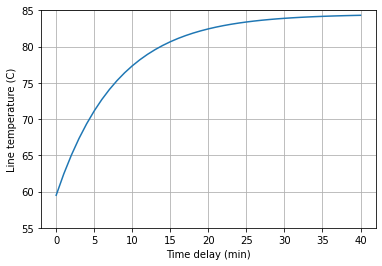

In [21]:
ax=plt.subplot()
ax.plot(t)
ax.grid(True)
ax.set_ylim([55, 85])
ax.set_ylabel('Line temperature (C)')
ax.set_xlabel('Time delay (min)');